# **Predictive Model Markup Language (PMML)**

- libreria per esportare i file .pmml: https://github.com/jpmml/sklearn2pmml
- libreria per importare i file .pmml: https://github.com/autodeployai/pypmml


In [ ]:
# installo sklearn2pmml
!pip install sklearn2pmml

#installo pypmml
!pip install pypmml

# **SALVARE UN MODELLO ADDESTRATO**

In [74]:

import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline



# sklearn to pmml
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline


In [75]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",
                      sep="\s+",
                      names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", 
                             "PRATIO", "B", "LSTAT", "MEDV"])

In [76]:

# sklearn2pmml vuole feature e labels come dataframe
# con i nomi associati alle colonne
X = df.drop("MEDV", axis=1)
Y = df["MEDV"]



In [77]:


# =====================
# [1] SPLIT
# =====================
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)




# =====================
# [2] ADDESTRAMENTO
# =====================
poly_degree         = 3
ridge_alpha         = 10
ridge_fit_intercept = True

slc   = StandardScaler()
poly  = PolynomialFeatures(degree=poly_degree)
ridge = Ridge(alpha=ridge_alpha, fit_intercept=ridge_fit_intercept)

pmml_pipe = PMMLPipeline(steps=[ ("slc", slc),
                            ("poly", poly),
                            ("ridge", ridge)] )

pmml_pipe.fit(X_train, Y_train)




# ===========
# [3] OUT
# ============
sklearn2pmml(pmml_pipe, "housing.pmml", with_repr = True)




# **CARICARE UN MODELLO ADDESTRATO**



In [78]:
# è preferibile usare un dataframe per passare i dati 
display(X_test)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216.0,18.6,393.24,8.05
100,0.14866,0.0,8.56,0,0.5200,6.727,79.9,2.7778,5,384.0,20.9,394.76,9.42
400,25.04610,0.0,18.10,0,0.6930,5.987,100.0,1.5888,24,666.0,20.2,396.90,26.77
485,3.67367,0.0,18.10,0,0.5830,6.312,51.9,3.9917,24,666.0,20.2,388.62,10.58
454,9.51363,0.0,18.10,0,0.7130,6.728,94.1,2.4961,24,666.0,20.2,6.68,18.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0.36920,0.0,9.90,0,0.5440,6.567,87.3,3.6023,4,304.0,18.4,395.69,9.28
287,0.03871,52.5,5.32,0,0.4050,6.209,31.3,7.3172,6,293.0,16.6,396.90,7.14
384,20.08490,0.0,18.10,0,0.7000,4.368,91.2,1.4395,24,666.0,20.2,285.83,30.63
108,0.12802,0.0,8.56,0,0.5200,6.474,97.1,2.4329,5,384.0,20.9,395.24,12.27


In [79]:
from pypmml import Model

# ==========
# [1] IN
# ==========
model = Model.fromFile('housing.pmml')

# ===============
# [2] PREDICT
# ===============
Y_pred = model.predict(X_test)



In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(" MSE:", mse, "  R2:", r2)

 MSE: 13.987951085493842   R2: 0.8482538794669743


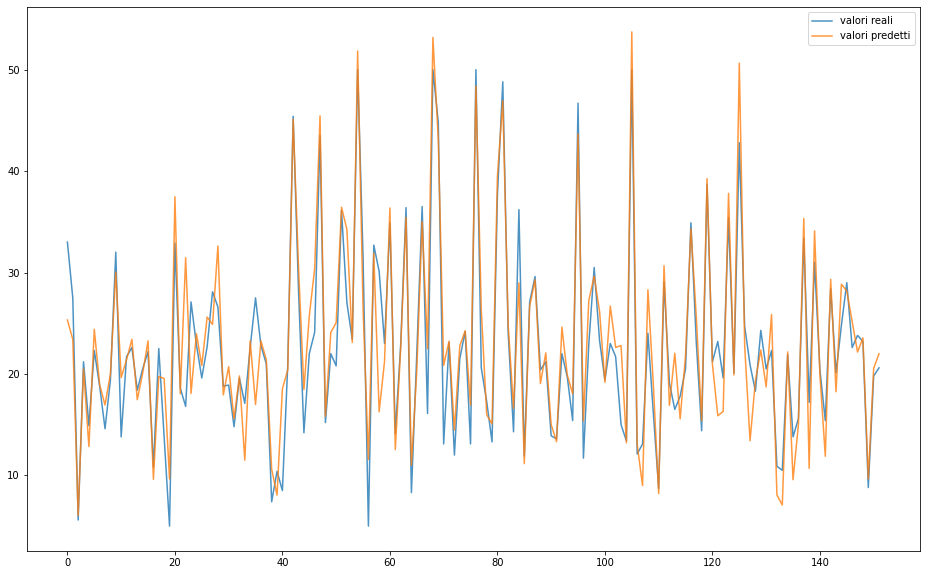

In [81]:
import matplotlib.pyplot as plt


# andamento valori reali e valori predetti
plt.figure(figsize=(16, 10))
plt.plot(np.arange(Y_test.size), Y_test,  alpha=0.8, label="valori reali")
plt.plot(np.arange(Y_pred.size), Y_pred, alpha=0.8, label="valori predetti")
plt.legend()
plt.show()

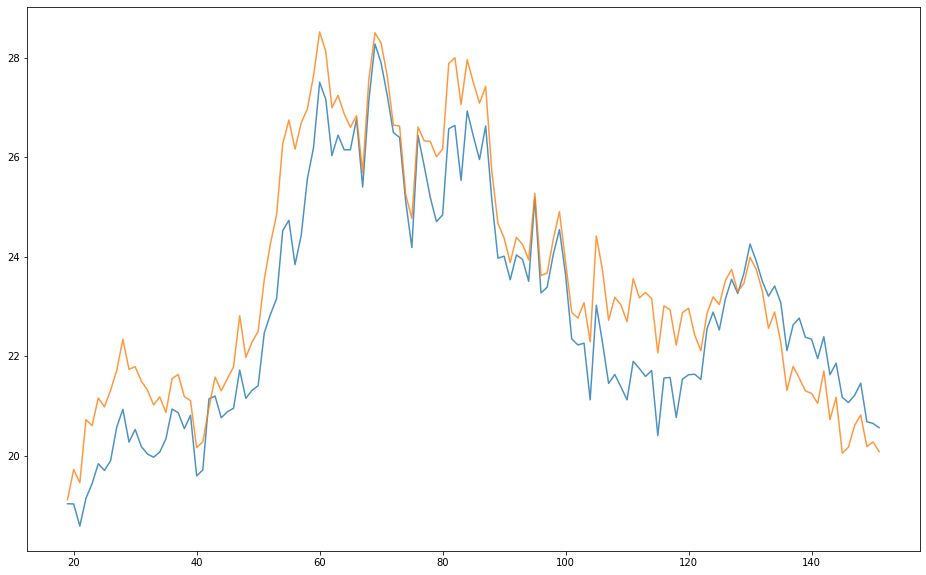

In [82]:
# andamento media mobile valori reali e valori predetti
r = 20
maverage_y_test = Y_test.rolling(r).mean() 
maverage_y_pred = Y_pred.rolling(r).mean() 

plt.figure(figsize=(16, 10))
plt.plot(np.arange(maverage_y_test.size), maverage_y_test,  alpha=0.8, label="valori reali")
plt.plot(np.arange(maverage_y_pred.size), maverage_y_pred, alpha=0.8, label="valori predetti")
plt.show()

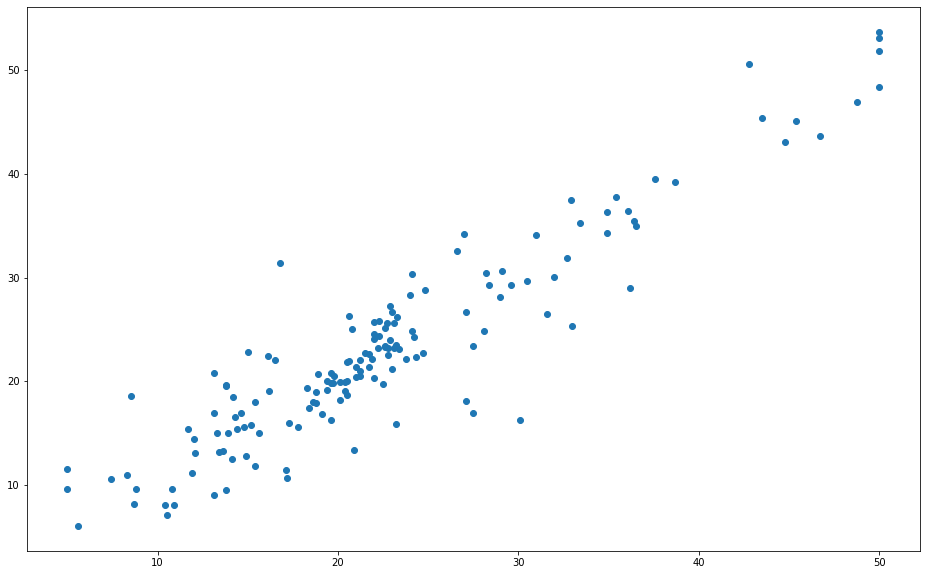

In [83]:
# varianza tra valori reali e valori predetti
plt.figure(figsize=(16, 10))
plt.scatter(Y_test, Y_pred)
plt.show()